<a href="https://colab.research.google.com/github/Isabella1245/Emerge-Data-Science-NASA/blob/main/Emerge_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section


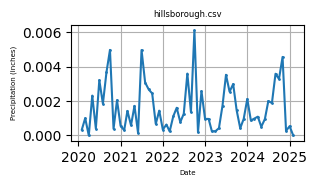
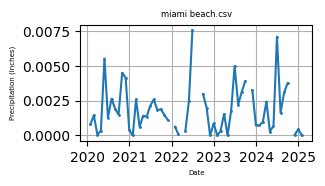
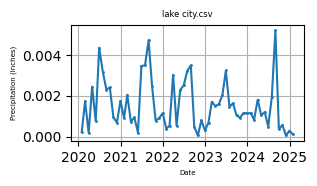
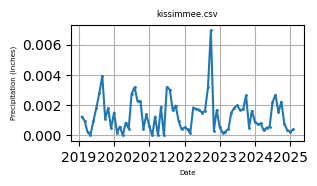
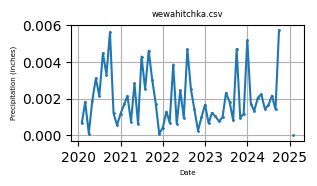
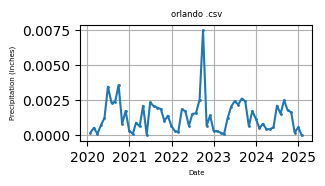
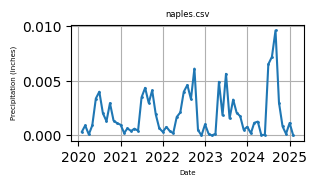
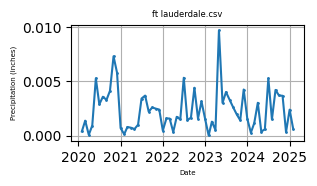

In [84]:
import pandas as pd                           # For working with data
pd.set_option("display.max_columns", None)    # Lets us see all columns of the data instead of just a preview
import geopandas as gpd                       # For working with spatial data
import numpy as np                            # For working with numbers
import matplotlib.pyplot as plt               # For making graphs
from datetime import date                     # For formatting dates
from PIL import Image                         # For getting and displaying images from links
import requests                               # For getting information from links
from io import BytesIO                        # For working with types of input and output
import seaborn as sns
import folium
import base64
import os

# helper
def normalize_county_name(name):
  return (
      name.lower()
        .replace(" ", "")
        .replace("-", "")
        .replace("'", "")
        .replace(".", "")
  )

def image_html_for_county(county_name):
  normalized = normalize_county_name(county_name)
  filename = f"images/{normalized}.png"
  if not os.path.exists(filename):
    return ""
  with open(filename, "rb") as f:
    encoded = base64.b64encode(f.read()).decode()
  return f'<img src="data:image/png;base64,{encoded}" width="200"><br>'

# end date for data
endDate = "2024-12-31"

# florida counties boundaries as spacial data (POLYGON)
flCounties = gpd.read_file('sample_data/florida_counties.geojson')

# geospacial mosquito information (POINT)
mosquito = gpd.read_file('https://raw.githubusercontent.com/geo-di-lab/emerge-lessons/main/docs/data/globe_mosquito.zip')
mosquito = mosquito.to_crs(flCounties.crs)
mosquito_fl = gpd.sjoin(
    mosquito,
    flCounties,
    how="inner",
    predicate="within"
)

# init folium basemap based on flCounties
map = folium.Map(location=[28.263363, -83.497652], tiles="CartoDB positron", zoom_start=7)

habitat_counts = (
    mosquito_fl.groupby("NAME")
    .size()
    .rename("habitat_count")
)

# Add each polygon as a marker on the map
for idx, row in flCounties.iterrows():
    countyName = row["NAME"]
    count = habitat_counts.get(countyName, 0)
    img_html = image_html_for_county(countyName)

    popupText = popup_html = f"""
    <div style="
    width: 250px;
    height: 150px;
    padding: 8px;
    font-size: 14px;
    overflow-y:
    auto;
    ">
    <b>{countyName} County</b><br>
    Mosquito habitats: {count} <br>
    {img_html}
    </div>
    """

    sim_geo = gpd.GeoSeries(row["geometry"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "#C3E2FB"}, name="Counties")
    folium.Popup(popupText).add_to(geo_j)
    geo_j.add_to(map)

# adding mosquito habitat layer
for idx, row, in mosquito_fl.iterrows():
    countyName = row["NAME"]
    species = row["Species"]
    waterSource = row["WaterSource"]
    longitude = row.geometry.x
    latitude = row.geometry.y

    popup_html = f"""
        <div style="
        width: 160px;
        padding: 6px;
        font-size: 13px;
        ">
        <b>Mosquito Habitat</b><br>
        County: {countyName} <br>
        Species: {species} <br>
        Water Source: {waterSource}
        </div>
        """

    folium.CircleMarker(
        location = [latitude, longitude],
        radius = 5,
        color = "blue",
        fill = True,
        fill_color = "red",
        fill_opacity = 0.5,
        popup=popup_html
    ).add_to(map)

#toggle layers
folium.LayerControl().add_to(map)

# rainfal by year
FLrainPerM = pd.read_csv('Florida-Rainfall-Data-FSU.csv', encoding='latin1')

yearCol = 'Year'
annualCol = "Annual"


# print(mosquito_fl.columns)
# pd.DataFrame({
#     "siteId": mosquito_fl["SiteId"],
#     "county": mosquito_fl["NAME"]
# })

display(map)

**bold text**# New Section

# New Section

DataSourceError: florida_counties.geojson: No such file or directory